In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
titanic=pd.read_csv('Titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
population = titanic['Age'].dropna()

H0: sample mean is equal to population mean
H1: sample mean is not equal to population mean

In [7]:
# sampling
sample_size = 50
sample = np.random.choice(population, sample_size,replace=False)

In [8]:
sample_mean = np.mean(sample)
sample_mean

27.6166

In [9]:
population_mean = np.mean(population)
population_mean

29.69911764705882

In [10]:
population_std = np.std(population)

In [11]:
n=len(sample)
standard_error = population_std/np.sqrt(n)

In [14]:
z_score = (sample_mean - population_mean)/standard_error
z_score

-1.0144184155728988

In [15]:
#set critical value
alpha = 0.05

In [17]:
z_critical = norm.ppf(1-alpha/2)
z_critical

1.959963984540054

In [19]:
if np.abs(z_score)> np.abs(z_critical):
    print('Reject Null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [20]:

z_critical_upper = norm.ppf(1-alpha/2)
z_critical_lower = norm.ppf(alpha/2)
print(z_critical_upper, z_critical_lower)

1.959963984540054 -1.9599639845400545


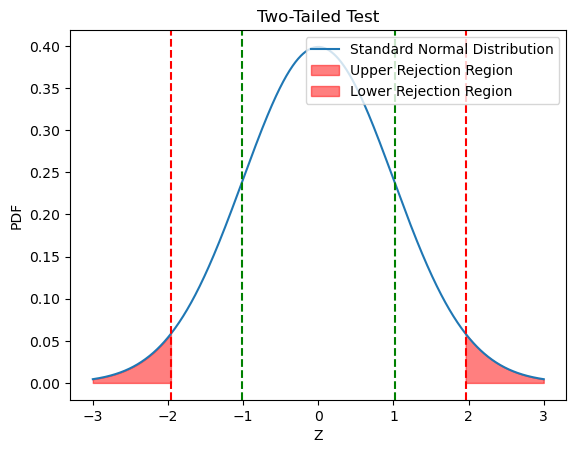

In [21]:
x=np.linspace(-3,3,1000)
y=norm.pdf(x,0,1)

plt.fig_size=(12,6)
plt.plot(x,y, label='Standard Normal Distribution')

plt.fill_between(x,y,where=(x>z_critical_upper),color='red',alpha=0.5,label='Upper Rejection Region')
plt.fill_between(x,y,where=(x<z_critical_lower),color='red',alpha=0.5,label='Lower Rejection Region')

plt.axvline(z_score, color='g',ls='--')
plt.axvline(-z_score, color='g',ls='--')

plt.axvline(z_critical_upper, color='r',ls='--')
plt.axvline(z_critical_lower, color='r',ls='--')

plt.xlabel('Z')
plt.ylabel('PDF')
plt.title('Two-Tailed Test')

plt.legend(loc=1)
plt.show()